# Bonus Challenge: Analyzing Pits

LayerData, like pits, have some nuance. This challenge will give us some chance to explore the data and get some practice querying and plotting. 
This can be done as a small group exercise.

Don't forget your [cheat sheets](https://snowexsql.readthedocs.io/en/latest/cheat_sheet.html)! 

**Goal**: Get more familiar with LayerData and create a vertical profile plot of density

**Approach**: 

1. Connect to the DB
2. Explore the data
2. Build a query filtering to the dataset you want
3. Convert to a GeoDataFrame and plot

## Process
### Step 1: Get connected

In [1]:
# Import the function to get connect to the db
from snowexsql.db import get_db

# Import our class for the layer data
from snowexsql.data import LayerData

# Import a useful function to format that data into a dataframe
from snowexsql.conversions import query_to_geopandas

# Import some tools to build dates 
from datetime import date

# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@db.snowexdata.org/snowex'

### Step 2: Explore the data

In [2]:
from snowexsql.db import get_table_attributes

# print the columns available
db_columns = get_table_attributes(LayerData)
print("These are the available columns in the table:\n \n* {}\n".format('\n* '.join(db_columns)))

These are the available columns in the table:
 
* bottom_depth
* comments
* date
* date_accessed
* depth
* doi
* easting
* elevation
* flags
* geom
* instrument
* latitude
* longitude
* metadata
* northing
* observers
* pit_id
* registry
* sample_a
* sample_b
* sample_c
* site_id
* site_name
* time
* time_created
* time_updated
* type
* units
* utm_zone
* value



#### Find the site names and site ids

In [3]:
# Connect
engine, session = get_db(db_name)

# Find the distinct site names
result = session.query(LayerData.site_name).filter(LayerData.type == 'density').distinct().all()
site_names = [r[0] for r in result]

# Find the distinct site_names for the site
print(site_names)

# Close session
session.close()

['American River Basin', 'Boise River Basin', 'Cameron Pass', 'East River', 'Fraser Experimental Forest', 'Grand Mesa', 'Jemez River', 'Little Cottonwood Canyon', 'Mammoth Lakes', 'Niwot Ridge', 'Sagehen Creek', 'Senator Beck']


In [4]:
# Connect
engine, session = get_db(db_name)

# We can filter to a site_name, change this to whichever value you want as the site name order may not be consistent
site_name = site_names[0]

# Find the distinct site ids for a site_name
result = session.query(LayerData.site_id)
result = result.filter(LayerData.type == 'density')
result = result.filter(LayerData.site_name == site_name)

result = result.distinct().all()
site_ids = [r[0] for r in result]

# Find the distinct site_ids for the site
print(site_ids)

# Close session
session.close()

['Caples Lake']


### Step 3: Build a query to get the values for 1 pit

A few things to keep in mind

* You will need to filter to one site_id and one unique date OR one pit_id
* You will need the density and depth columns to create a vertical profile

In [11]:
# Your code here
engine, session = get_db(db_name)
dt = date(2019, 12, 20)
result = session.query(LayerData)
result = result.filter(LayerData.site_name == site_name)
result = result.filter(LayerData.type == 'density')
result = result.filter(LayerData.date == dt)
session.close()

### Step 4: Convert to a GeoDataFrame and plot

Text(0, 0.5, 'Density')

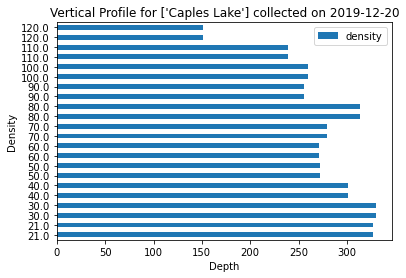

In [23]:
# Use the query you built to build a GeoDataFrame and plot the data
# Your code here
df = query_to_geopandas(result, engine)
df['density'] = df['value']
df['density'] = df['density'].astype("float64")
import matplotlib as plt
import pandas as pd
new_df = pd.DataFrame(df)
plot = new_df.sort_values(by="depth").plot(y="density",x="depth",kind="barh")
plot.set_title(f'Vertical Profile for {site_ids} collected on {dt.strftime("%Y-%m-%d")}')
plot.set_xlabel("Depth")
plot.set_ylabel("Density")

### Extra: Can you get the bulk density of the snowpack?

In [25]:
# Your code here
bulk_density = df['density'].mean()
plot.axvline(x=bulk_density, color = "black")
plt.legend(["mean density",f'{site_ids} density'])
plt.show()

In [ ]:
# a block for closing errant sessions
session.close()